In [ ]:
#Dimensionality Reduction - Used to find a small set of most impactful features among a large number of features.
#Feature selection methods - 1.Filter(variance,pearson,chi-square) 2.wrapper 3.embeded(Lasso,Ridge,Decision trees)
#Feature Extraction methods - Creating a new features from the exsisting ones.->1.PCA(principal component analysis -used o reduce the dimension of large datasets by transforming large set of variables in to smaller ones.)

In [9]:
#Step -1 : Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  

In [10]:
#step-2 : Load wine dataset
wine = load_wine()
x=wine.data
y=wine.target
feature_names=wine.feature_names
target_names=wine.target_names

In [11]:
#step-3 : Explore and standardize the dataset
df = pd.DataFrame(x,columns=feature_names)
df['Target']=y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [12]:
#step-4 : Standardize the features
scaler =StandardScaler()
x_scaled=scaler.fit_transform(x)

In [13]:
#step-5:Apply PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
x_pca[:5]

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082]])

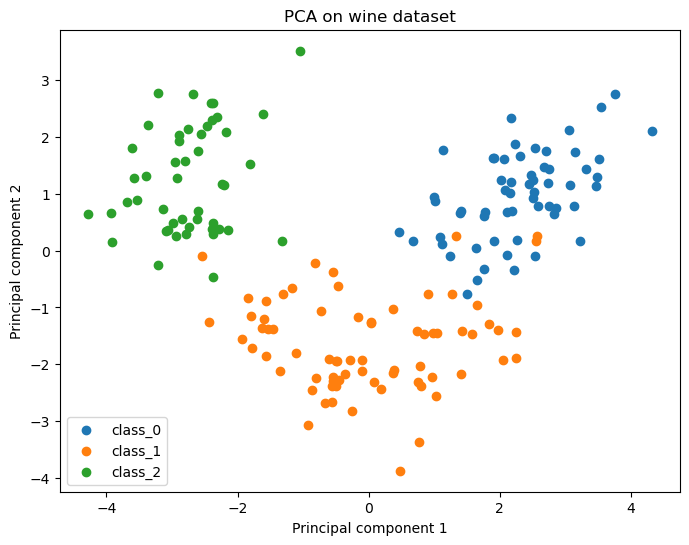

In [15]:
#Step-4 : Visualize PCA ouput in 2d
#plot the pca transformed data
plt.figure(figsize=(8,6))
for i,target_name in enumerate(target_names):
    plt.scatter(x_pca[y==i,0],x_pca[y==i,1],label=target_name)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('PCA on wine dataset')
plt.legend()
plt.show()

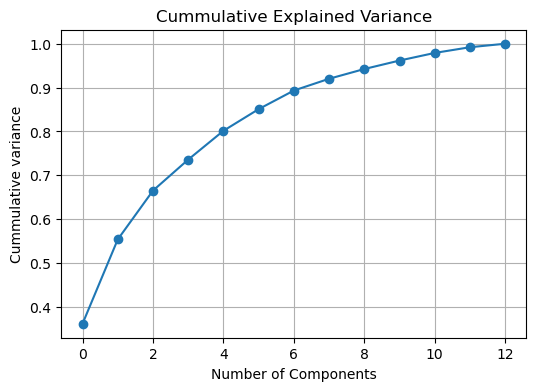

In [17]:
pca_full = PCA().fit(x_scaled)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_),marker='o')
plt.title('Cummulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.grid(True)
plt.show()

In [37]:
#Step -1 : Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [38]:
#step -2 : Load the Parkinson’s dataset.
df = pd.read_csv('parkinsons.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [21]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [23]:
#step-3 :Drop the name column (not a feature).
df.drop(columns=['name'], inplace=True)

In [24]:
# Step 4: Separate features (X) and target (y)
X = df.drop(columns=['status'])  # Features
y = df['status']  # Target (0 = Healthy, 1 = Parkinson's)

In [25]:
# Step 5: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [26]:
# Step 6: Apply PCA (reduce to 2 or 3 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

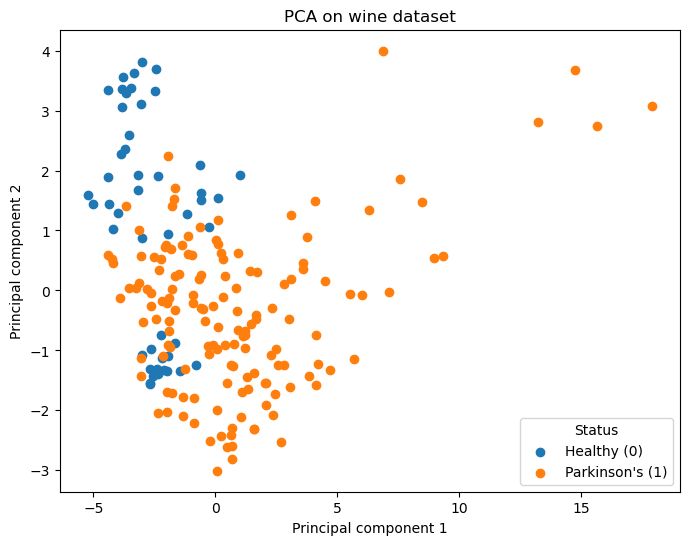

In [30]:
#Step-7 : Visualize PCA ouput in 2d
#plot the pca transformed data
#Visualize the first two components in a scatter plot colored by disease status (status column).
plt.figure(figsize=(8,6))
for i,target_name in enumerate(target_names):
    plt.scatter(X_pca[y==i,0],X_pca[y==i,1],label=target_name)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('PCA on wine dataset')
plt.legend(title="Status", labels=["Healthy (0)", "Parkinson's (1)"])
plt.show()

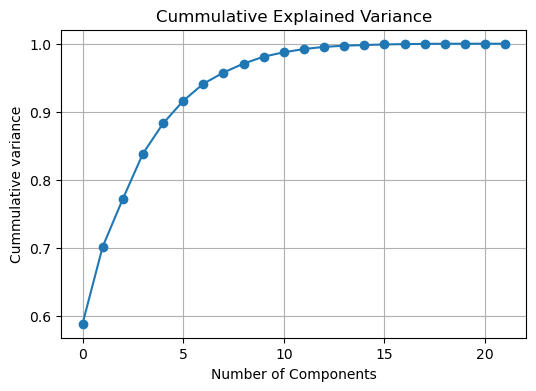

In [29]:
#step-8:Plot the explained variance ratio and cumulative explained variance.
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_),marker='o')
plt.title('Cummulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.grid(True)
plt.show()

In [34]:
# Step 9: Plot explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# Step 10: Print variance explained by each component
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Cumulative Explained Variance: {cumulative_variance}")

Explained Variance Ratio: [0.58900504 0.1129943 ]
Cumulative Explained Variance: [0.58900504 0.70199934]


# t-SNE(T-distributed stochastic nieghbor embedding)}

In [35]:
#Dimensionality reduction technique.Better visualization than PCA for complex clusters.popular in nlp,bioinformatics.

In [36]:
#Step -1 : Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 

In [39]:
#step_2 : Load and standardize the data
iris = load_iris()
x = iris.data
y=iris.target
target_names = iris.target_names

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [40]:
#Step-3:Apply t-SNE
tsne = TSNE(n_components=2,perplexity=30,learning_rate=200,n_iter=1000,random_state=42)
x_tsne = tsne.fit_transform(x_scaled)

#create dataframe for visualization
df_tsne=pd.DataFrame(x_tsne,columns=["Dim1","Dim2"])
df_tsne['Target'] = y

C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


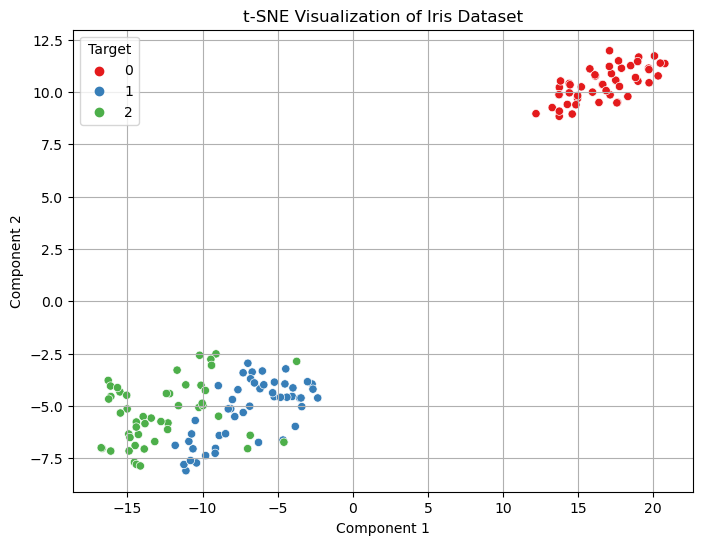

In [41]:
#Step-4: Visualize t-SNE output
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_tsne,x="Dim1",y="Dim2",hue="Target",palette="Set1")
plt.title("t-SNE Visualization of Iris Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

In [42]:
#Step -1 : Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 

In [43]:
df = pd.read_csv('fashion-mnist_test.csv')
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,...,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,44,88,99,122,123,80,0,0,0,0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,212,240,213,239,233,239,231,232,236,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,235,210,241,222,171,220,199,236,27,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,220,244,206,0,87,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,2,0,0,0,0,0,140,116,85,109,121,63,0,0,0,0,0,0,0,0,...,50,0,0,0,0,0,0,0,29,19,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,184,127,185,198,213,239,126,237,255,236,173,4,0,0,0,0,0,0,0,0,...,90,55,0,0,0,0,0,255,243,255,4,209,255,254,255,255,255,255,255,255,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,235,202,166,180,207,217,228,112,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,70,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,37,93,72,58,55,63,66,89,159,120,20,0,0,0,0,1,0,0,0,0,0,0,1,0,0,22,67,125,151,168,198,242,225,238,255,229,199,164,156,126,50,0,0,1,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,2,0,19,170,144,142,137,135,132,133,124,112,112,115,117,117,113,146,41,0,3,0,0,0,0,0,0,0,1,0,1,76,54,55,51,53,53,55,53,44,38,37,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,0,0,76,36,110,170,78,136,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,115,10,55,76,63,60,65,39,0,0,0,0,0,0,0,0,0,0,0,0,...,76,0,0,0,0,0,0,0,42,55,115,10,0,65,81,63,78,115,110,86,94,84,70,44,0,36,152,65,110,0,0,0,0,0,0,0,21,57,89,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,0,1,3,0,14,152,184,158,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,16,224,56,0,163,218,0,0,1,0,0,0,0,0,0,0,0,0,0,...,200,0,0,0,0,0,2,0,0,163,232,204,231,222,221,222,219,217,213,214,219,223,226,239,247,241,224,213,144,0,0,0,0,0,0,1,0,44,232,199,200,190,180,179,185,189,191,185,179,1

In [44]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,...,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,44,88,99,122,123,80,0,0,0,0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,212,240,213,239,233,239,231,232,236,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,235,210,241,222,171,220,199,236,27,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,220,244,206,0,87,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,2,0,0,0,0,0,140,116,85,109,121,63,0,0,0,0,0,0,0,0,...,50,0,0,0,0,0,0,0,29,19,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,184,127,185,198,213,239,126,237,255,236,173,4,0,0,0,0,0,0,0,0,...,90,55,0,0,0,0,0,255,243,255,4,209,255,254,255,255,255,255,255,255,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,235,202,166,180,207,217,228,112,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,70,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [45]:
#Flatten the Image Data:
X = df.drop(columns=['label'])  # Features (784 pixels)
y = df['label']  # Target labels (clothing categories)

In [50]:
#Apply PCA (Preprocessing for t-SNE):
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce dimensions before t-SNE
X_pca = pca.fit_transform(X)

In [51]:
#Use t-SNE for Visualization:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

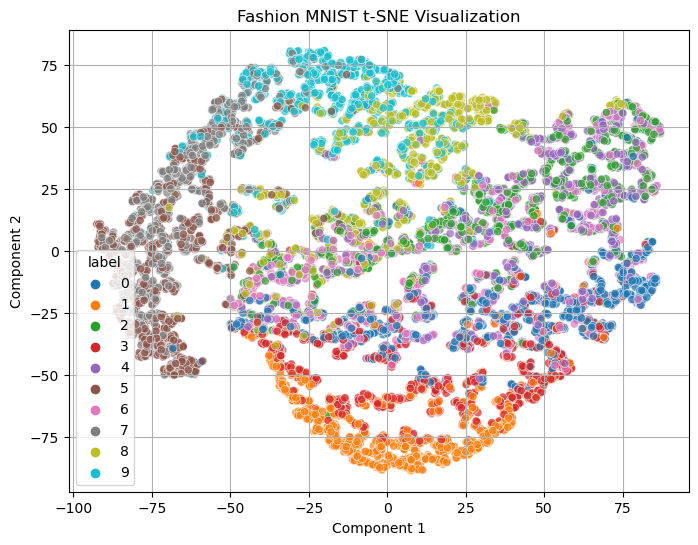

In [52]:
#Plot the t-SNE Clusters:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette='tab10', alpha=0.7)
plt.title("Fashion MNIST t-SNE Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()